**Pendeteksian Tepi - Collaborative Exercises**

# 1.Soal 1: Jenis-Jenis Tepi

**Pertanyaan:**

**1. Jelaskan empat jenis tepi yang biasa ditemukan dalam citra digital.**
1. Tepi Langkah (Step Edge): Tepi ini terjadi ketika ada perubahan mendadak dalam intensitas pixel antara dua area yang berdekatan. Contohnya adalah perbatasan antara area gelap dan terang pada citra
2. Tepi Atap (Roof Edge): Jenis tepi ini muncul ketika intensitas pixel naik secara perlahan hingga mencapai puncaknya, kemudian turun kembali. Ini sering ditemukan di area dengan gradien halus, seperti bayangan atau lekukan pada permukaan
3. Tepi Garis (Line Edge): Tepi ini muncul sebagai garis sempit yang memiliki intensitas lebih tinggi atau lebih rendah dibandingkan area di sekitarnya. Contohnya adalah kabel atau retakan tipis pada permukaan
4. Tepi Derau (Noisy Edge): Tepi ini disebabkan oleh gangguan atau derau pada citra. Intensitas pixelnya berubah secara acak dan tidak teratur, sehingga memerlukan metode khusus untuk mendeteksinya dengan akurat

**2. Berikan contoh masing-masing jenis tepi dalam kehidupan sehari-hari.**
1. Tepi Langkah (Step Edge):
Contohnya adalah perbatasan antara langit biru cerah dan gedung tinggi, atau tepi buku yang kontras dengan meja kayu
2. Tepi Atap (Roof Edge):
Contohnya adalah bayangan gunung di kejauhan saat matahari terbenam, di mana intensitas cahaya perlahan berubah dari terang ke gelap hingga puncaknya
3. Tepi Garis (Line Edge):
Contohnya adalah benang hitam di atas kain putih, atau antena tipis yang menjulur di atap rumah
4. Tepi Derau (Noisy Edge):
Contohnya adalah pantulan cahaya di permukaan air yang berombak atau pada rekaman CCTV berkualitas rendah dengan banyak gangguan visual

**3. Mengapa tepi dengan derau memerlukan pendekatan khusus untuk pendeteksiannya?**

Tepi dengan derau butuh pendekatan khusus karena derau bisa bikin tepi asli jadi tidak jelas atau tertutup. Begini beberapa alasannya:
1. Gangguan pada Perubahan Intensitas:
Derau sering bikin intensitas pixel berubah-ubah dengan cepat tapi tidak ada hubungannya dengan tepi yang sebenarnya. Ini bisa bikin deteksi tepi jadi salah (false edges).
2. Sulit Mendeteksi Tepi yang Konsisten:
Derau bisa bikin garis tepi jadi terputus-putus atau tidak jelas, jadi susah buat menentukan tepi yang utuh.
3. Kepekaan Operator Tepi:
Operator deteksi tepi kayak Sobel atau Canny sangat sensitif sama perubahan intensitas kecil yang disebabkan derau. Tanpa filtering sebelumnya, derau malah bikin hasilnya jadi tidak akurat.
4. Bikin Performa Jadi Lambat:
Derau bikin data yang harus diproses jadi lebih banyak, jadi bisa bikin algoritma jadi lambat dan hasilnya jadi kurang optimal.
5. Pentingnya Tepi yang Bersih:
Kalau buat aplikasi kayak segmentasi citra atau analisis objek, tepi yang jelas dan valid itu penting banget. Derau bisa ngurangin kualitas data, dan bikin langkah pengolahan citra selanjutnya jadi nggak akurat.

Solusinya:
 Sebelum mendeteksi tepi, citra perlu difilter terlebihdahulu buat menghilangkan derau. Filter seperti Gaussian, median, atau bilateral bisa dipakai buat menghaluskan citra tanpa ngerusak tepi yang penting. Algoritma seperti Canny juga udah punya filter buat ngatasin masalah derau ini.

# Soal 2: Pendeteksian Tepi Menggunakan Operator Gradien

**Pertanyaan:**

**1. Operator Sobel dan Prewitt digunakan untuk pendeteksian tepi. Pilih salah satu operator tersebut.**

Saya disini memilih operator sobel

**2. Implementasikan kode Python menggunakan pustaka seperti NumPy atau OpenCV untuk mendeteksi tepi dalam sebuah citra.**

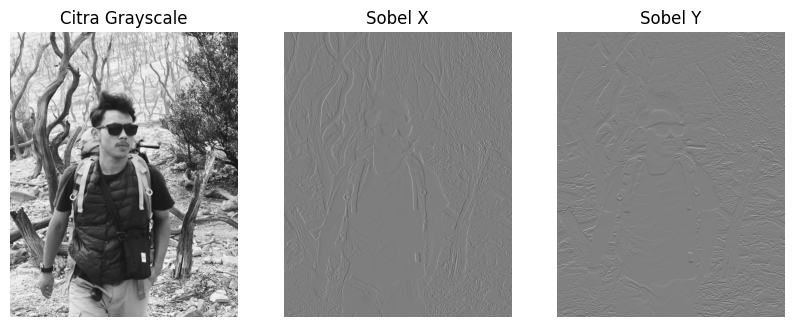

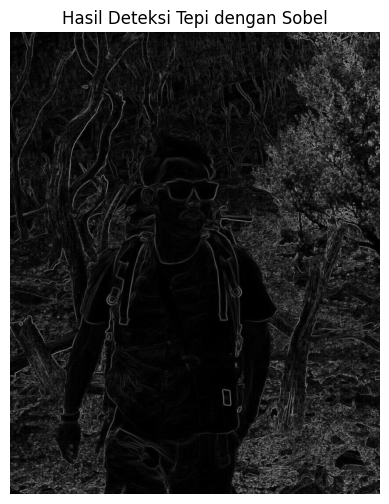

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Langkah 1: Membaca citra dan mengubah ke grayscale
image = cv2.imread('/content/2024_04_18_22_02_IMG_3602.JPG')  # Gantilah dengan path gambar yang sesuai
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Langkah 2: Aplikasikan Sobel Operator untuk mendeteksi tepi
sobel_x = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=3)  # Gradien horizontal
sobel_y = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=3)  # Gradien vertikal

# Langkah 3: Kombinasikan hasil Sobel X dan Sobel Y untuk mendapatkan magnitude gradien
sobel_combined = cv2.magnitude(sobel_x, sobel_y)

# Langkah 4: Menampilkan hasil
plt.figure(figsize=(10, 6))

plt.subplot(1, 3, 1), plt.imshow(gray_image, cmap='gray')
plt.title('Citra Grayscale'), plt.axis('off')

plt.subplot(1, 3, 2), plt.imshow(sobel_x, cmap='gray')
plt.title('Sobel X'), plt.axis('off')

plt.subplot(1, 3, 3), plt.imshow(sobel_y, cmap='gray')
plt.title('Sobel Y'), plt.axis('off')

plt.figure(figsize=(6, 6))
plt.imshow(sobel_combined, cmap='gray')
plt.title('Hasil Deteksi Tepi dengan Sobel'), plt.axis('off')
plt.show()


**3. Jelaskan langkah-langkah implementasi secara rinci.**

1. Pertama, citra dimuat menggunakan OpenCV dengan fungsi cv2.imread(), lalu diubah menjadi grayscale menggunakan cv2.cvtColor() agar hanya memproses satu saluran warna, sehingga lebih sederhana dan efisien.
2. Setelah itu, operator Sobel diterapkan pada citra grayscale untuk menghitung gradien intensitas dalam dua arah, yaitu horizontal (Sobel X) dan vertikal (Sobel Y). Ini dilakukan dengan fungsi cv2.Sobel(), di mana parameter yang diberikan menentukan arah gradien (1 untuk Sobel X dan 0 untuk Sobel Y), serta ukuran kernel yang digunakan untuk konvolusi.
3. Hasil dari Sobel X dan Sobel Y digabungkan untuk menghitung magnitude (besar) gradien menggunakan fungsi cv2.magnitude(). Proses ini memberikan informasi tentang intensitas tepi secara keseluruhan dari kedua arah.
4. Terakhir, hasil deteksi tepi ditampilkan menggunakan pustaka Matplotlib. Beberapa gambar ditampilkan, termasuk citra asli dalam grayscale, hasil Sobel X, hasil Sobel Y, dan gabungan keduanya untuk memberikan gambaran lengkap tentang deteksi tepi.


# Soal 3: Perbandingan Operator Pendeteksi Tepi

**Pertanyaan:**

**1. Berikan perbandingan antara operator Sobel, Prewitt, dan Canny berdasarkan:**
*   **Akurasi pendeteksian**
1. Sobel:
Akurasinya cukup baik untuk mendeteksi tepi dasar, terutama pada perubahan intensitas yang tajam. Namun, Sobel lebih sensitif terhadap derau, sehingga hasilnya bisa kurang akurat jika citra memiliki banyak gangguan.
2. Prewitt:
Akurasinya sedikit lebih rendah dibandingkan Sobel karena kernel Prewitt tidak memperhitungkan bobot tambahan di pusat, yang membuat deteksi gradiennya kurang halus. Cocok untuk kasus sederhana.
3. Canny:
Memiliki akurasi tertinggi di antara ketiganya karena menggunakan pendekatan multi-tahap, termasuk penghalusan (smoothing), deteksi gradien, dan penindasan non-maksimum. Metode ini menghasilkan tepi yang lebih presisi dengan mengurangi efek derau.
*  **Kompleksitas komputasi**
1. Sobel:
Memiliki kompleksitas komputasi sedang karena menggunakan kernel yang sedikit lebih kompleks dibandingkan Prewitt. Kernel Sobel melibatkan bobot yang lebih besar pada pusat sehingga membutuhkan lebih banyak operasi per pixel.
2. Prewitt:
Kompleksitasnya paling rendah di antara ketiganya karena kernel Prewitt sederhana, tanpa bobot tambahan. Oleh karena itu, Prewitt lebih cepat tetapi kurang presisi untuk citra yang kompleks.
3. Canny:
Memiliki kompleksitas tertinggi karena mencakup beberapa langkah, seperti Gaussian smoothing untuk mengurangi derau, perhitungan gradien, penindasan non-maksimum, dan thresholding dengan histeresis. Proses ini membuat Canny lebih lambat tetapi memberikan hasil yang sangat akurat.

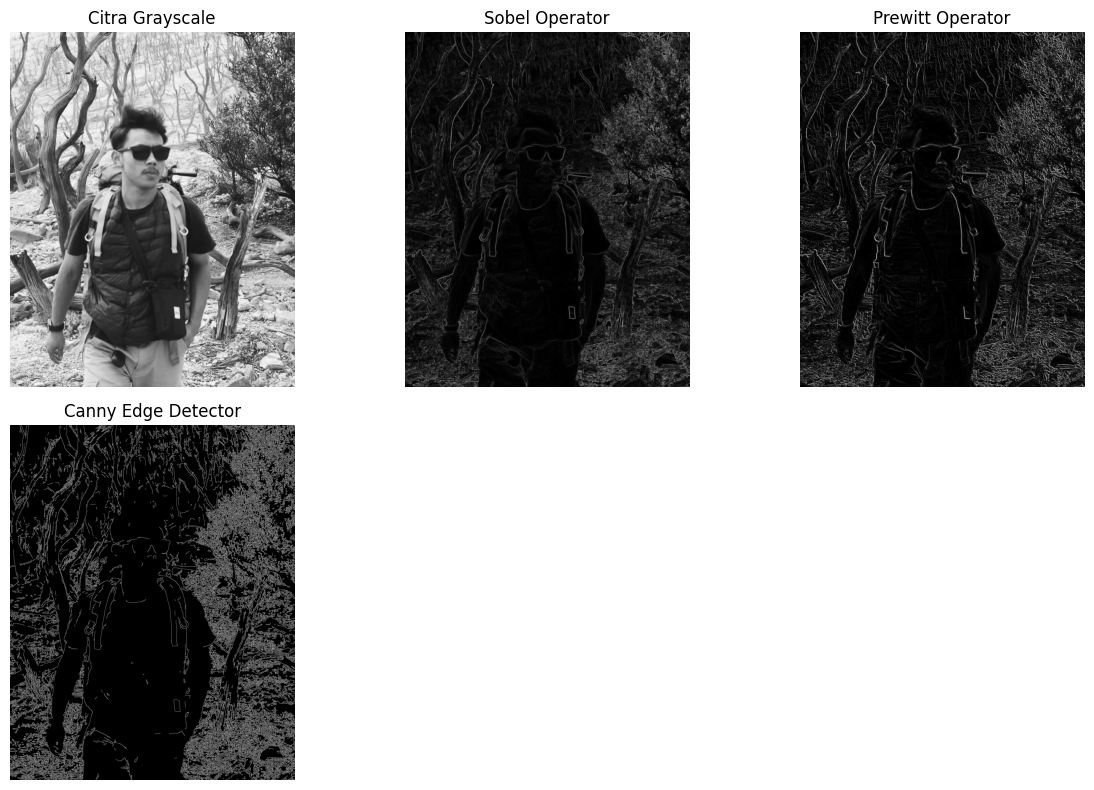

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Langkah 1: Membaca citra dan mengubah ke grayscale
image = cv2.imread('/content/2024_04_18_22_02_IMG_3602.JPG')  # Gantilah dengan path gambar yang sesuai
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Langkah 2: Sobel Operator
sobel_x = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=3)  # Sobel X
sobel_y = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=3)  # Sobel Y
sobel_combined = cv2.magnitude(sobel_x, sobel_y)            # Magnitude Sobel

# Langkah 3: Prewitt Operator (manual kernel)
prewitt_x = cv2.filter2D(gray_image, -1, np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]]))  # Prewitt X
prewitt_y = cv2.filter2D(gray_image, -1, np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]]))  # Prewitt Y
prewitt_combined = cv2.magnitude(prewitt_x.astype('float32'), prewitt_y.astype('float32'))  # Magnitude Prewitt

# Langkah 4: Canny Edge Detector
canny_edges = cv2.Canny(gray_image, 100, 200)  # Threshold bisa disesuaikan

# Langkah 5: Tampilkan hasil
plt.figure(figsize=(12, 8))

# Citra Asli
plt.subplot(2, 3, 1), plt.imshow(gray_image, cmap='gray')
plt.title('Citra Grayscale'), plt.axis('off')

# Sobel
plt.subplot(2, 3, 2), plt.imshow(sobel_combined, cmap='gray')
plt.title('Sobel Operator'), plt.axis('off')

# Prewitt
plt.subplot(2, 3, 3), plt.imshow(prewitt_combined, cmap='gray')
plt.title('Prewitt Operator'), plt.axis('off')

# Canny
plt.subplot(2, 3, 4), plt.imshow(canny_edges, cmap='gray')
plt.title('Canny Edge Detector'), plt.axis('off')

plt.tight_layout()
plt.show()


**2. Dalam situasi apa operator Canny lebih direkomendasikan dibanding operator lainnya?**

Operator Canny direkomendasikan ketika dibutuhkan deteksi tepi yang sangat akurat dan bersih, terutama pada citra yang memiliki derau, area kontras rendah, atau detail visual yang kompleks. Dengan proses smoothing dan threshold histeresis, Canny menghasilkan tepi yang terhubung dan minim gangguan, sehingga cocok untuk aplikasi seperti deteksi objek, segmentasi, atau pengolahan citra medis. Meskipun lebih lambat dibandingkan Sobel atau Prewitt, hasilnya lebih andal untuk tugas-tugas yang memerlukan presisi tinggi.

# Soal 4: Pendeteksian Tepi pada Citra Noisy

**Pertanyaan:**

**1. Sebuah citra memiliki derau "salt-and-pepper". Lakukan langkah berikut:**
*   **Terapkan Gaussian filter untuk mengurangi derau.**
*   **Gunakan metode Sobel dan Canny untuk mendeteksi tepi.**

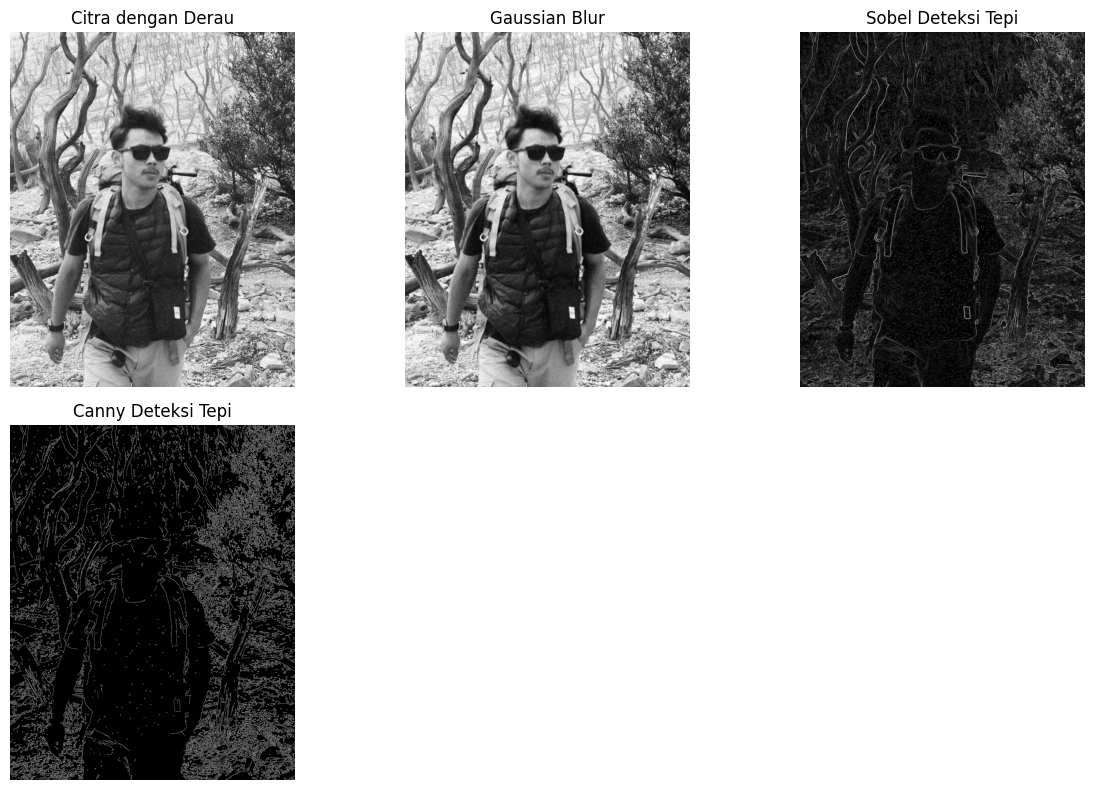

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Langkah 1: Membaca citra
image = cv2.imread('/content/2024_04_18_22_02_IMG_3602.JPG', cv2.IMREAD_GRAYSCALE)  # Ganti dengan path citra yang sesuai

# Langkah 2: Menambahkan derau salt-and-pepper untuk simulasi
noisy_image = image.copy()
rows, cols = noisy_image.shape
salt_pepper_ratio = 0.02  # Proporsi derau
num_salt = int(salt_pepper_ratio * rows * cols / 2)
num_pepper = int(salt_pepper_ratio * rows * cols / 2)

# Tambahkan noise salt
for _ in range(num_salt):
    x, y = np.random.randint(0, rows), np.random.randint(0, cols)
    noisy_image[x, y] = 255

# Tambahkan noise pepper
for _ in range(num_pepper):
    x, y = np.random.randint(0, rows), np.random.randint(0, cols)
    noisy_image[x, y] = 0

# Langkah 3: Mengurangi derau dengan Gaussian filter
blurred_image = cv2.GaussianBlur(noisy_image, (5, 5), 0)

# Langkah 4: Deteksi tepi menggunakan Sobel
sobel_x = cv2.Sobel(blurred_image, cv2.CV_64F, 1, 0, ksize=3)  # Sobel X
sobel_y = cv2.Sobel(blurred_image, cv2.CV_64F, 0, 1, ksize=3)  # Sobel Y
sobel_combined = cv2.magnitude(sobel_x, sobel_y)               # Magnitude Sobel

# Langkah 5: Deteksi tepi menggunakan Canny
canny_edges = cv2.Canny(blurred_image, 100, 200)  # Threshold bisa disesuaikan

# Langkah 6: Visualisasi hasil
plt.figure(figsize=(12, 8))

# Citra asli dengan derau
plt.subplot(2, 3, 1), plt.imshow(noisy_image, cmap='gray')
plt.title('Citra dengan Derau'), plt.axis('off')

# Citra setelah Gaussian blur
plt.subplot(2, 3, 2), plt.imshow(blurred_image, cmap='gray')
plt.title('Gaussian Blur'), plt.axis('off')

# Hasil Sobel
plt.subplot(2, 3, 3), plt.imshow(sobel_combined, cmap='gray')
plt.title('Sobel Deteksi Tepi'), plt.axis('off')

# Hasil Canny
plt.subplot(2, 3, 4), plt.imshow(canny_edges, cmap='gray')
plt.title('Canny Deteksi Tepi'), plt.axis('off')

plt.tight_layout()
plt.show()


**2. Bandingkan hasil pendeteksian dari kedua metode dengan citra asli.**

Sobel menghasilkan tepi yang lebih kasar dan lebih lebar, serta lebih sensitif terhadap derau, sementara Canny memberikan hasil yang lebih presisi, tajam, dan lebih halus. Canny lebih efektif dalam mengurangi pengaruh derau dan mendeteksi tepi yang terhubung dengan baik. Oleh karena itu, Canny lebih direkomendasikan jika tujuan utamanya adalah mendapatkan tepi yang akurat dan jelas, terutama pada citra dengan derau.

**3. Berikan analisis hasil yang diperoleh.**

Hasil analisis yang diperoleh dari perbandingan antara Sobel dan Canny adalah
1. Sobel:
*   Mendeteksi tepi dengan baik namun hasilnya lebih kasar dan kurang tajam
*   Tepi yang terdeteksi lebih lebar, dan masih terdapat efek derau meskipun sudah diterapkan filter Gaussian
*   Sensitif terhadap derau yang tersisa, yang membuat hasil pendeteksian tepi kurang bersih

2. Canny:

*   Hasilnya lebih presisi, tajam, dan bersih. Tepi yang dihasilkan lebih halus dan terhubung dengan baik
*   Lebih efektif dalam mengurangi pengaruh derau berkat proses smoothing dan thresholding histeresis
*   Mampu menghasilkan tepi yang lebih akurat dengan sedikit gangguan dari derau, menjadikannya lebih cocok untuk citra dengan kualitas rendah atau berderau

Secara keseluruhan, Canny lebih unggul dalam mendeteksi tepi dengan hasil yang lebih akurat dan bersih, terutama dalam citra yang mengandung derau, sementara Sobel lebih cepat tetapi menghasilkan tepi yang lebih kasar dan lebih rentan terhadap derau

